In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

# 2.1 時系列の分布と定常性（p.13〜）

In [2]:
# 船舶のデータ
df_hakusan = pd.read_csv('../data/hakusan.csv',encoding="shift-jis")

In [3]:
df_hakusan.head()

方向角速度    X2   横揺れ   縦揺れ    X5    X6    舵角
0  -2.92 -1.51 -1.39  2.97  1.31 -7.10 -6.89
1  -2.63 -0.86 -2.34  1.77  0.36 -4.92 -6.25
2  -1.48 -0.43 -2.46  1.44 -0.90 -3.63 -6.12
3  -0.45 -6.03 -1.58  1.30 -0.77 -5.64 -6.81
4   0.00 -4.84 -2.35  1.36 -1.42 -8.07 -7.62

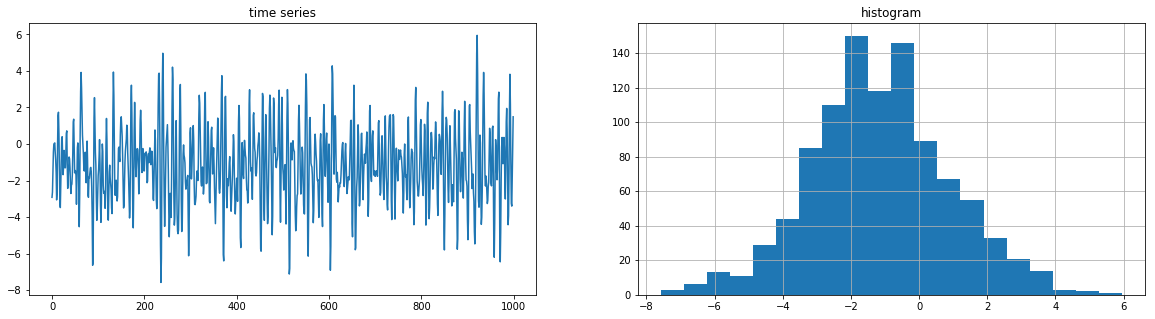

In [4]:
# 図2.1 (a)船舶の方向角速度の時系列とヒストグラム
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 5))
df_hakusan['方向角速度'].plot(ax=axes[0]); ax=axes[0].set_title('time series')
df_hakusan['方向角速度'].hist(ax=axes[1],bins=20); ax=axes[1].set_title('histogram')

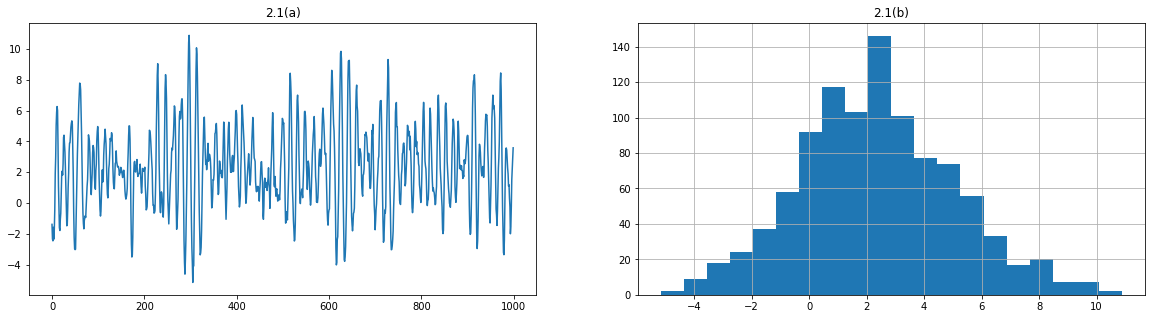

In [5]:
# 図2.1 (b)船舶の横揺れの時系列とヒストグラム
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 5))
df_hakusan['横揺れ'].plot(ax=axes[0]); ax=axes[0].set_title('2.1(a)')
df_hakusan['横揺れ'].hist(ax=axes[1],bins=20); ax=axes[1].set_title('2.1(b)')

- 図2.1(a)(b)の時系列では異なる特徴を持つが、ヒストグラムではほとんど区別がつかない
- 変動の特徴の違いをヒストグラムでは捉えきれない

In [6]:
# ２期前のデータを作成
df_hakusan['方向角速度_shift2'] = df_hakusan['方向角速度'].shift(2)
df_hakusan['横揺れ_shift2'] = df_hakusan['横揺れ'].shift(2)

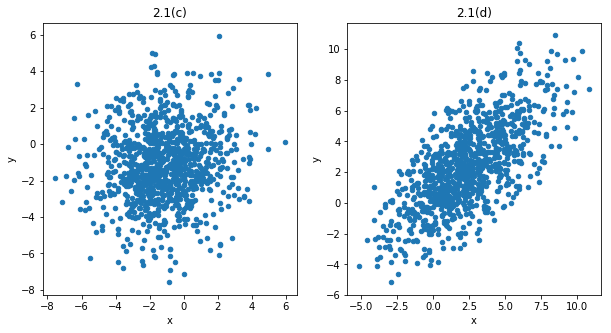

In [7]:
# 図2.1 (c) 縦軸をy_{n}, 横軸を2期前のy_{n-2}
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
df_hakusan.plot.scatter(ax=axes[0],x='方向角速度_shift2', y='方向角速度'); 
ax=axes[0].set_title('2.1(c)')
ax=axes[0].set_xlabel('x')
ax=axes[0].set_ylabel('y')

# 図2.1 (d) 縦軸をy_{n}, 横軸を2期前のy_{n-2}
df_hakusan.plot.scatter(ax=axes[1], x='横揺れ_shift2', y='横揺れ'); 
ax=axes[1].set_title('2.1(d)')
ax=axes[1].set_xlabel('x')
ax=axes[1].set_ylabel('y')

- 図2.1 (c)
    - ほぼ円形に分布
    - 相関なし
- 図2.1 (d)
    - 2期前と正の相関を持つ

In [8]:
# 4期前のデータを作成
df_hakusan['方向角速度_shift4'] = df_hakusan['方向角速度'].shift(4)
df_hakusan['横揺れ_shift4'] = df_hakusan['横揺れ'].shift(4)

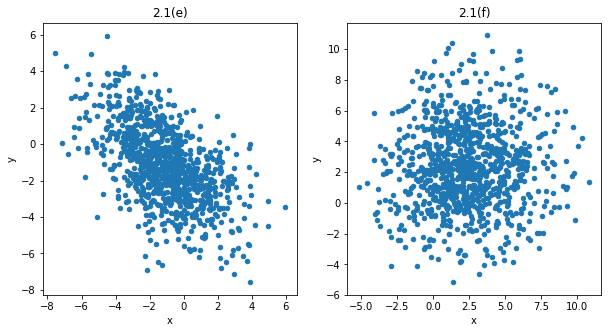

In [9]:
# 図2.1 (e) 縦軸をy_{n}, 横軸を4期前のy_{n-4}
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
df_hakusan.plot.scatter(ax=axes[0],x='方向角速度_shift4', y='方向角速度'); 
ax=axes[0].set_title('2.1(e)')
ax=axes[0].set_xlabel('x')
ax=axes[0].set_ylabel('y')

# 図2.1 (f) 縦軸をy_{n}, 横軸を2期前のy_{n-4}
df_hakusan.plot.scatter(ax=axes[1], x='横揺れ_shift4', y='横揺れ'); 
ax=axes[1].set_title('2.1(f)')
ax=axes[1].set_xlabel('x')
ax=axes[1].set_ylabel('y')

- 図2.1 (e)
    - 負の相関を持つ
- 図2.1 (f)
    - 相関なし

## 以上の結果から言えること
- 時系列解析においては、時間的な関連を無視して$y_{n}$だけの分布だけ調べても時系列の特徴は捉えられない
- 一般に、$y_{n}$と$y_{n-k}$の同時分布をみて、どのような関連があるか調べる必要がある